In [2]:
%matplotlib inline

In [103]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from sklearn.tree import DecisionTreeClassifier, plot_tree, export_text
from sklearn.ensemble import RandomForestClassifier

from sklearn.datasets import load_iris, load_digits
from sklearn.inspection import permutation_importance

from xgboost import XGBClassifier

ModuleNotFoundError: No module named 'xgboost'

# Tree and Ensemble Models

## Live Demo


In [4]:
data = load_iris()

In [23]:
data.feature_names

['sepal length (cm)',
 'sepal width (cm)',
 'petal length (cm)',
 'petal width (cm)']

In [8]:
attrs, tgt = data.data, data.target

In [42]:
tree = DecisionTreeClassifier()

In [43]:
tree.fit(attrs, tgt)

DecisionTreeClassifier()

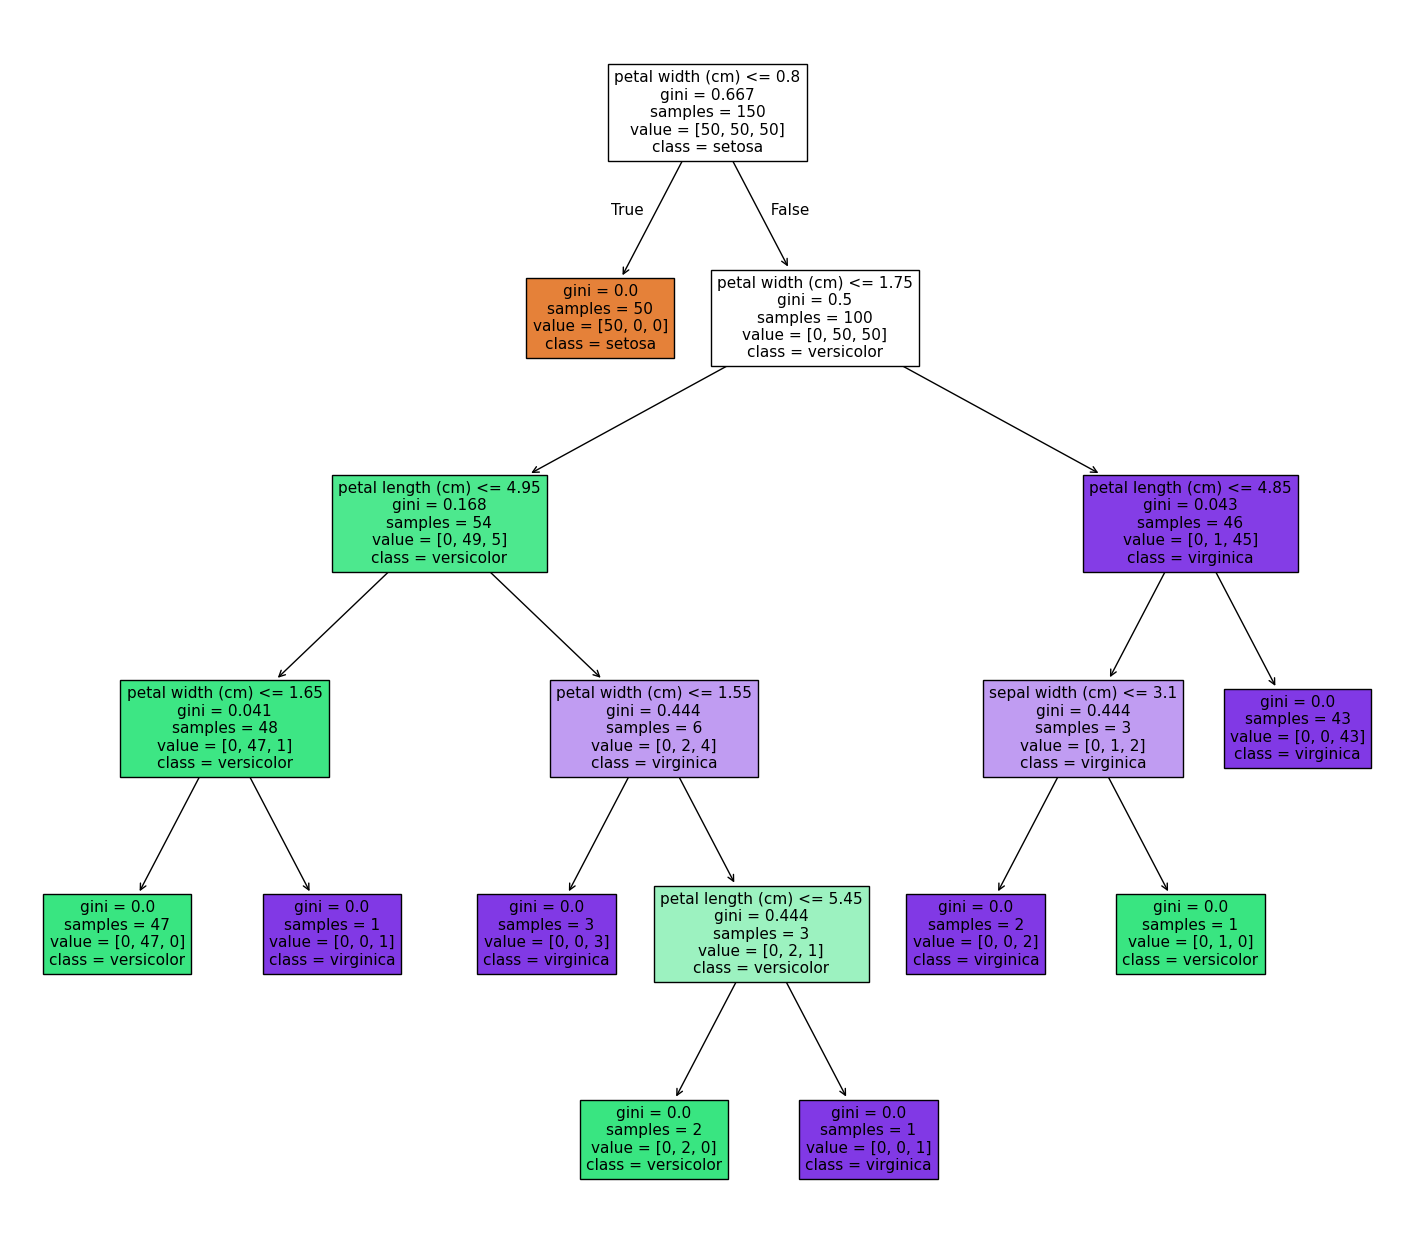

In [44]:
plt.figure(figsize=(18,16))
plot_tree(tree, feature_names=data.feature_names, class_names=data.target_names, filled=True)
plt.show()

Top cell is called **root**. *Always* left arrow is **True**, right is **False**. x[0:3] are the feature names

In [46]:
digits = load_digits()

In [55]:
digits_attrs, digit_tgt = digits.data, digits.target

In [50]:
tree = DecisionTreeClassifier()

In [56]:
tree.fit(digits_attrs, digit_tgt)

DecisionTreeClassifier()

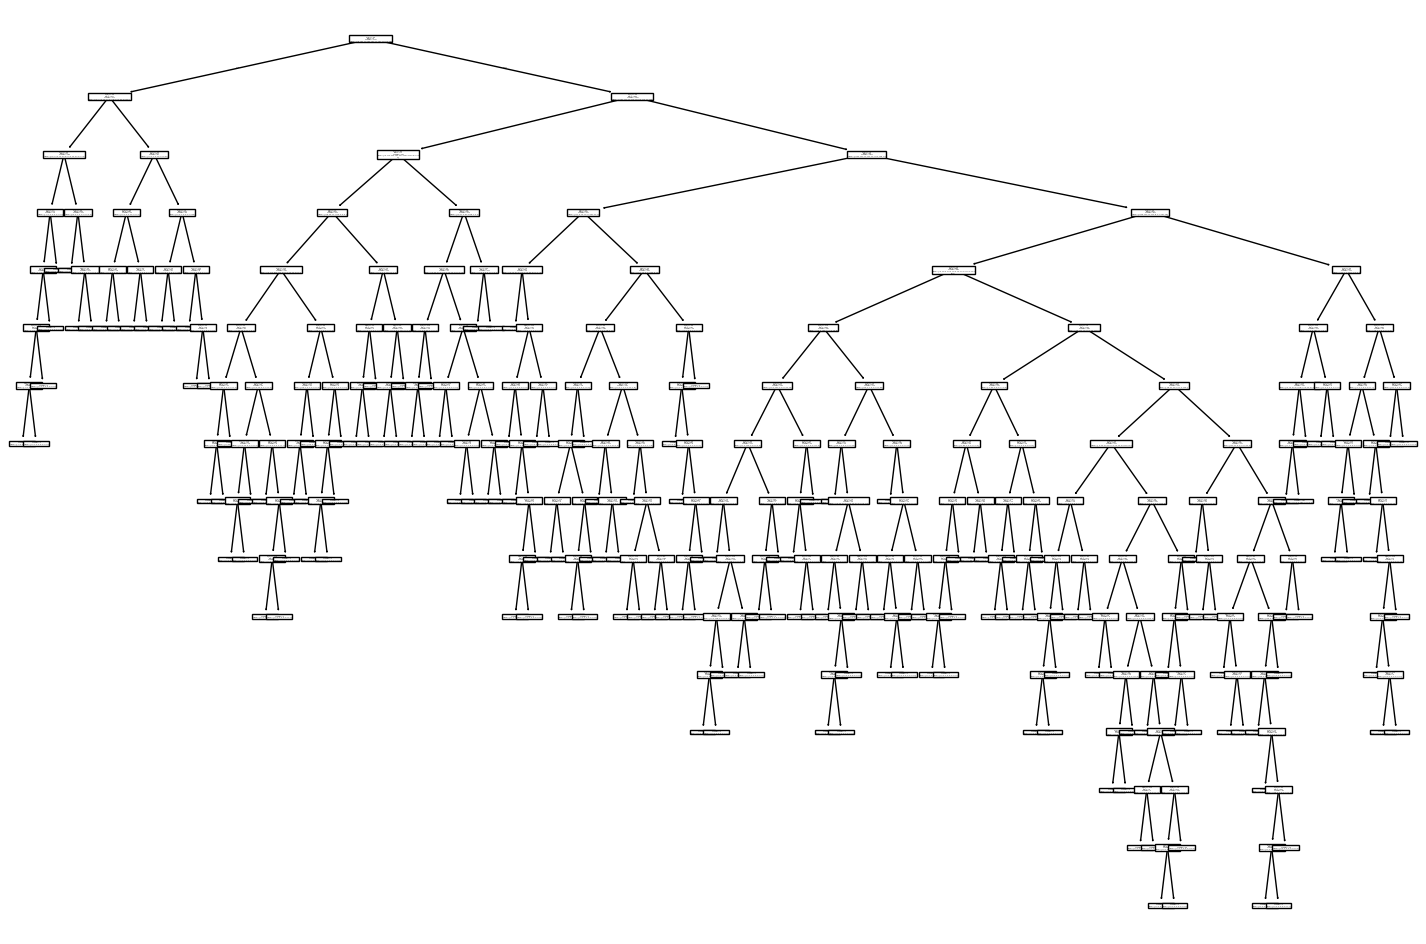

In [65]:
plt.figure(figsize=(18,12))
plot_tree(tree)
plt.show()

In [67]:
tree.get_depth()

15

### Decision forests

In [73]:
trees = [
    DecisionTreeClassifier(max_depth=5).fit(digits_attrs, digit_tgt),
    DecisionTreeClassifier(max_depth=2).fit(digits_attrs, digit_tgt),
    DecisionTreeClassifier(max_depth=10).fit(digits_attrs, digit_tgt),
    DecisionTreeClassifier(max_depth=14).fit(digits_attrs, digit_tgt),
    DecisionTreeClassifier().fit(digits_attrs, digit_tgt)
]
result = {}
for i, tree in enumerate(trees):
    result[f'tree_{i}'] = tree.predict(digits_attrs)

In [74]:
result

{'tree_0': array([0, 8, 8, ..., 8, 3, 8]),
 'tree_1': array([0, 7, 7, ..., 7, 7, 7]),
 'tree_2': array([0, 1, 2, ..., 8, 9, 8]),
 'tree_3': array([0, 1, 2, ..., 8, 9, 8]),
 'tree_4': array([0, 1, 2, ..., 8, 9, 8])}

In [75]:
pd.DataFrame(result)

,tree_0,tree_1,tree_2,tree_3,tree_4
0,0,0,0,0,0
1,8,7,1,1,1
2,8,7,2,2,2
3,2,6,3,3,3
4,4,0,4,4,4
...,...,...,...,...,...
1792,3,7,9,9,9
1793,0,0,0,0,0
1794,8,7,8,8,8
1795,3,7,9,9,9


This is not a forest. It is boarding classifier

In [78]:
forest = RandomForestClassifier()

In [79]:
forest.fit(digits_attrs, digit_tgt)

RandomForestClassifier()

In [81]:
forest.estimator_

DecisionTreeClassifier()

In [92]:
forest.feature_importances_

array([0.00000000e+00, 2.15369499e-03, 1.83871992e-02, 1.08871380e-02,
       9.80327769e-03, 1.84886931e-02, 9.72689234e-03, 8.66539037e-04,
       8.25305890e-06, 9.76146711e-03, 2.78706428e-02, 7.17012926e-03,
       1.56436211e-02, 2.65047300e-02, 5.78594307e-03, 6.29583102e-04,
       1.54397878e-04, 6.36354914e-03, 2.05878671e-02, 2.25776782e-02,
       3.04534114e-02, 5.46375984e-02, 9.40577391e-03, 2.25016130e-04,
       8.69241215e-05, 1.45245279e-02, 4.00127112e-02, 2.64280970e-02,
       3.29666501e-02, 2.26127816e-02, 3.28207656e-02, 7.86843304e-05,
       0.00000000e+00, 3.04592674e-02, 2.78635419e-02, 1.87057805e-02,
       4.00738939e-02, 1.91598727e-02, 2.27654790e-02, 0.00000000e+00,
       1.44362296e-05, 1.15571373e-02, 3.59345846e-02, 4.42292569e-02,
       2.31364395e-02, 1.73552812e-02, 2.00749736e-02, 9.31813141e-05,
       2.84089237e-05, 1.83340572e-03, 1.77122058e-02, 1.84136367e-02,
       1.42405319e-02, 2.22422152e-02, 2.12594543e-02, 1.83344333e-03,
      

In [95]:
# the method feature_importances_ should not be used
list(zip((digits.feature_names), np.round(forest.feature_importances_, 4)))

[('pixel_0_0', 0.0),
 ('pixel_0_1', 0.0022),
 ('pixel_0_2', 0.0184),
 ('pixel_0_3', 0.0109),
 ('pixel_0_4', 0.0098),
 ('pixel_0_5', 0.0185),
 ('pixel_0_6', 0.0097),
 ('pixel_0_7', 0.0009),
 ('pixel_1_0', 0.0),
 ('pixel_1_1', 0.0098),
 ('pixel_1_2', 0.0279),
 ('pixel_1_3', 0.0072),
 ('pixel_1_4', 0.0156),
 ('pixel_1_5', 0.0265),
 ('pixel_1_6', 0.0058),
 ('pixel_1_7', 0.0006),
 ('pixel_2_0', 0.0002),
 ('pixel_2_1', 0.0064),
 ('pixel_2_2', 0.0206),
 ('pixel_2_3', 0.0226),
 ('pixel_2_4', 0.0305),
 ('pixel_2_5', 0.0546),
 ('pixel_2_6', 0.0094),
 ('pixel_2_7', 0.0002),
 ('pixel_3_0', 0.0001),
 ('pixel_3_1', 0.0145),
 ('pixel_3_2', 0.04),
 ('pixel_3_3', 0.0264),
 ('pixel_3_4', 0.033),
 ('pixel_3_5', 0.0226),
 ('pixel_3_6', 0.0328),
 ('pixel_3_7', 0.0001),
 ('pixel_4_0', 0.0),
 ('pixel_4_1', 0.0305),
 ('pixel_4_2', 0.0279),
 ('pixel_4_3', 0.0187),
 ('pixel_4_4', 0.0401),
 ('pixel_4_5', 0.0192),
 ('pixel_4_6', 0.0228),
 ('pixel_4_7', 0.0),
 ('pixel_5_0', 0.0),
 ('pixel_5_1', 0.0116),
 ('pixel_5

In [98]:
# using permutation importance for feature importance
permutation_importance(forest, digits_attrs, digit_tgt)

{'importances_mean': array([0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.00946021, 0.        , 0.        , 0.        ,
        0.        , 0.00077908, 0.        , 0.        , 0.        ,
        0.0001113 , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.00077908, 0.00155815, 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.00055648, 0.        , 0.        , 0.        ]),
 'importances_std': array([0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        ,

In [102]:
list(zip((digits.feature_names), np.round(permutation_importance(forest, digits_attrs, digit_tgt)['importances_mean'], 4)))

[('pixel_0_0', 0.0),
 ('pixel_0_1', 0.0),
 ('pixel_0_2', 0.0),
 ('pixel_0_3', 0.0),
 ('pixel_0_4', 0.0),
 ('pixel_0_5', 0.0),
 ('pixel_0_6', 0.0),
 ('pixel_0_7', 0.0),
 ('pixel_1_0', 0.0),
 ('pixel_1_1', 0.0),
 ('pixel_1_2', 0.0),
 ('pixel_1_3', 0.0),
 ('pixel_1_4', 0.0),
 ('pixel_1_5', 0.0),
 ('pixel_1_6', 0.0),
 ('pixel_1_7', 0.0),
 ('pixel_2_0', 0.0),
 ('pixel_2_1', 0.0),
 ('pixel_2_2', 0.0),
 ('pixel_2_3', 0.0),
 ('pixel_2_4', 0.0003),
 ('pixel_2_5', 0.0081),
 ('pixel_2_6', 0.0),
 ('pixel_2_7', 0.0),
 ('pixel_3_0', 0.0),
 ('pixel_3_1', 0.0),
 ('pixel_3_2', 0.0011),
 ('pixel_3_3', 0.0),
 ('pixel_3_4', 0.0),
 ('pixel_3_5', 0.0001),
 ('pixel_3_6', 0.0001),
 ('pixel_3_7', 0.0),
 ('pixel_4_0', 0.0),
 ('pixel_4_1', 0.0),
 ('pixel_4_2', 0.0),
 ('pixel_4_3', 0.0),
 ('pixel_4_4', 0.0),
 ('pixel_4_5', 0.0),
 ('pixel_4_6', 0.0),
 ('pixel_4_7', 0.0),
 ('pixel_5_0', 0.0),
 ('pixel_5_1', 0.0),
 ('pixel_5_2', 0.001),
 ('pixel_5_3', 0.001),
 ('pixel_5_4', 0.0),
 ('pixel_5_5', 0.0),
 ('pixel_5_6', 